# Example 2a: Binary Classifier

# 1. Use Case Intake

The goal of this exercise is to build a statistical model to identify fraudulent financial transactions from authentic ones. Due to the limited availability of financial customer data, we are using a synthetic dataset that is modelled after the transaction records of a private financial services company which supports a mobile payments platform.  The fraudulent transactions we are attempting to identify have been simulated to have a pattern of malicious behavior that we hope to capture in our analysis.

## Solving a Binary Classification Problem with Logisitic Regression

The outcome of our classification will result in two choices: whether a transaction is fraudulent or not fraudulent. For this exercise, we have chosen to model this binary choice using logistic regression. 
<br><br>Logistic regression is the appropriate regression analysis to conduct when the dependent (response or outcome) variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent (predictor or explanatory) variables.
<br><br>We will explore the benefits and limitations of this approach by evaluating the results by exploring accuracy measures such as precision and recall over a sample of test data. 
https://www.statisticssolutions.com/what-is-logistic-regression/

## Overview of Data Set

Here is an overview of the definitions of each variable in the data set provided by the creator of the data set. We will need to perform our own analyses on the contents of the data to fill in any information not described here:<br>
- step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
- type - the type of transaction. Can be one of the following: 
    - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
- amount - amount of the transaction in local currency.
- nameOrig - account name of the customer who started the transaction.
- oldbalanceOrg - initial balance before the transaction.
- newbalanceOrig - new balance after the transaction.
- nameDest - account name of the customer who is the recipient of the transaction.
- oldbalanceDest - initial balance of the recipienta account before the transaction. Note that there is no information for customers that start with M (Merchants).
- newbalanceDest - new balance the recipient account after the transaction. Note that there is no information for customers that start with M (Merchants).
- isFraud - This is the transaction made by the fraudulent agents inside the simulation. In this specific dataset, the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
- isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# Example 2a Exercise: Code Walkthrough 

Before we start the code review waltkthrough, we need to have the following packages installed to run the code: dplyr, ggplot2, reshape2, caret, e1071, stringr, and Metrics.

In [17]:
options(warn=-1)
#Load required packages
library(dplyr)
library(ggplot2)
library(reshape2)
library(caret)
library(e1071)
library(caTools)
library(ISLR)
library(stringr)
library(Metrics)

## 2. Data Preprocessing

In [18]:
paysim <- read.csv("C:/Users/jared.mcculloch/Desktop/AI Groundwork/PS_20174392719_1491204439457_withNulls_log.csv")

### Initial Observations

In [19]:
# View the variables
head(paysim)

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,PAYMENT,9839.64,C1231006815,NA,NA,M1979787155,0,0,0,0
1,PAYMENT,1864.28,C1666544295,NA,NA,M2044282225,0,0,0,0
1,TRANSFER,181.00,C1305486145,181,0,C553264065,0,0,1,0
1,CASH_OUT,181.00,C840083671,181,0,C38997010,21182,0,1,0
1,PAYMENT,11668.14,C2048537720,NA,NA,M1230701703,0,0,0,0
1,PAYMENT,7817.71,C90045638,NA,NA,M573487274,0,0,0,0


### Finding the Primary Key

In [20]:
# Identify primary key
total_size = (length(paysim[[1]]))
print(paste("total size of data set:", total_size))
print(paste("variables:", colnames(paysim)))

[1] "total size of data set: 6362620"
 [1] "variables: step"           "variables: type"          
 [3] "variables: amount"         "variables: nameOrig"      
 [5] "variables: oldbalanceOrg"  "variables: newbalanceOrig"
 [7] "variables: nameDest"       "variables: oldbalanceDest"
 [9] "variables: newbalanceDest" "variables: isFraud"       
[11] "variables: isFlaggedFraud"


###  Extra Steps: Checking the Data Types

In [21]:
sapply(paysim, class)

step           type         amount       nameOrig  oldbalanceOrg 
     "integer"       "factor"      "numeric"       "factor"      "numeric" 
newbalanceOrig       nameDest oldbalanceDest newbalanceDest        isFraud 
     "numeric"       "factor"      "numeric"      "numeric"      "integer" 
isFlaggedFraud 
     "integer"

In [22]:
summary(paysim)

      step             type             amount                nameOrig      
 Min.   :  1.0   CASH_IN :1399284   Min.   :       0   C1065307291:      3  
 1st Qu.:156.0   CASH_OUT:2237500   1st Qu.:   13390   C1462946854:      3  
 Median :239.0   DEBIT   :  41432   Median :   74872   C1530544995:      3  
 Mean   :243.4   PAYMENT :2151495   Mean   :  179862   C1677795071:      3  
 3rd Qu.:335.0   TRANSFER: 532909   3rd Qu.:  208721   C1784010646:      3  
 Max.   :743.0                      Max.   :92445517   C1832548028:      3  
                                                       (Other)    :6362602  
 oldbalanceOrg      newbalanceOrig            nameDest      
 Min.   :       0   Min.   :       0   C1286084959:    113  
 1st Qu.:       0   1st Qu.:       0   C985934102 :    109  
 Median :   14208   Median :       0   C665576141 :    105  
 Mean   :  833884   Mean   :  855114   C2083562754:    102  
 3rd Qu.:  107315   3rd Qu.:  144258   C1590550415:    101  
 Max.   :59585040 

In [23]:
# Check the character data types
print(paste("What values are in the type variable?", unique(paysim$type)))
print(paste("What values are in the isFraud?", unique(paysim$isFraud)))
print(paste("What values are in the isFlaggedFraud?", unique(paysim$isFlaggedFraud)))

[1] "What values are in the type variable? PAYMENT" 
[2] "What values are in the type variable? TRANSFER"
[3] "What values are in the type variable? CASH_OUT"
[4] "What values are in the type variable? DEBIT"   
[5] "What values are in the type variable? CASH_IN" 
[1] "What values are in the isFraud? 0" "What values are in the isFraud? 1"
[1] "What values are in the isFlaggedFraud? 0"
[2] "What values are in the isFlaggedFraud? 1"


### Handling Missing Values

In [24]:
# Check for missing values
print(paste("Are there missing values in the data set?", any(is.na(paysim))))

[1] "Are there missing values in the data set? TRUE"


In [25]:
# Review all entries with missing values
paysim[is.na(paysim),]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.7,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.8,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.9,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [26]:
paysim <- na.omit(paysim)
head(paysim)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0,0.00,1,0
4,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182,0.00,1,0
8,1,PAYMENT,7861.64,C1912850431,176087.2,168225.59,M633326333,0,0.00,0,0
9,1,PAYMENT,4024.36,C1265012928,2671.0,0.00,M1176932104,0,0.00,0,0
10,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898,40348.79,0,0
11,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845,157982.12,0,0


### Transforming Categorical Variables

In [27]:
# Create binary from categorical type variable
# We just have one categorical value that needs transforming

paysim2 <- paysim
paysim3 <- paysim$type

TRANSFER <- gsub("TRANSFER",1,as.character(paysim3))
TRANSFER <- gsub("(PAYMENT)|(CASH_OUT)|(DEBIT)|(CASH_IN)",0,TRANSFER)
paysim2 <- cbind(paysim2,TRANSFER)

PAYMENT <- gsub("PAYMENT",1,as.character(paysim3))
PAYMENT <- gsub("(TRANSFER)|(CASH_OUT)|(DEBIT)|(CASH_IN)",0,PAYMENT)
paysim2 <- cbind(paysim2,PAYMENT)

CASH_OUT <- gsub("CASH_OUT",1,as.character(paysim3))
CASH_OUT <- gsub("(TRANSFER)|(PAYMENT)|(DEBIT)|(CASH_IN)",0,CASH_OUT)
paysim2 <- cbind(paysim2,CASH_OUT)

DEBIT <- gsub("DEBIT",1,as.character(paysim3))
DEBIT <- gsub("(TRANSFER)|(PAYMENT)|(CASH_OUT)|(CASH_IN)",0,DEBIT)
paysim2 <- cbind(paysim2,DEBIT)

CASH_IN <- gsub("CASH_IN",1,as.character(paysim3))
CASH_IN <- gsub("(TRANSFER)|(PAYMENT)|(CASH_OUT)|(DEBIT)",0,CASH_IN)
paysim2 <- cbind(paysim2,CASH_IN)

paysim <- paysim2

head(paysim)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,TRANSFER,PAYMENT,CASH_OUT,DEBIT,CASH_IN
3,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0,0.00,1,0,1,0,0,0,0
4,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182,0.00,1,0,0,0,1,0,0
8,1,PAYMENT,7861.64,C1912850431,176087.2,168225.59,M633326333,0,0.00,0,0,0,1,0,0,0
9,1,PAYMENT,4024.36,C1265012928,2671.0,0.00,M1176932104,0,0.00,0,0,0,1,0,0,0
10,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898,40348.79,0,0,0,0,0,1,0
11,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845,157982.12,0,0,0,0,0,1,0


### Identifying Outliers

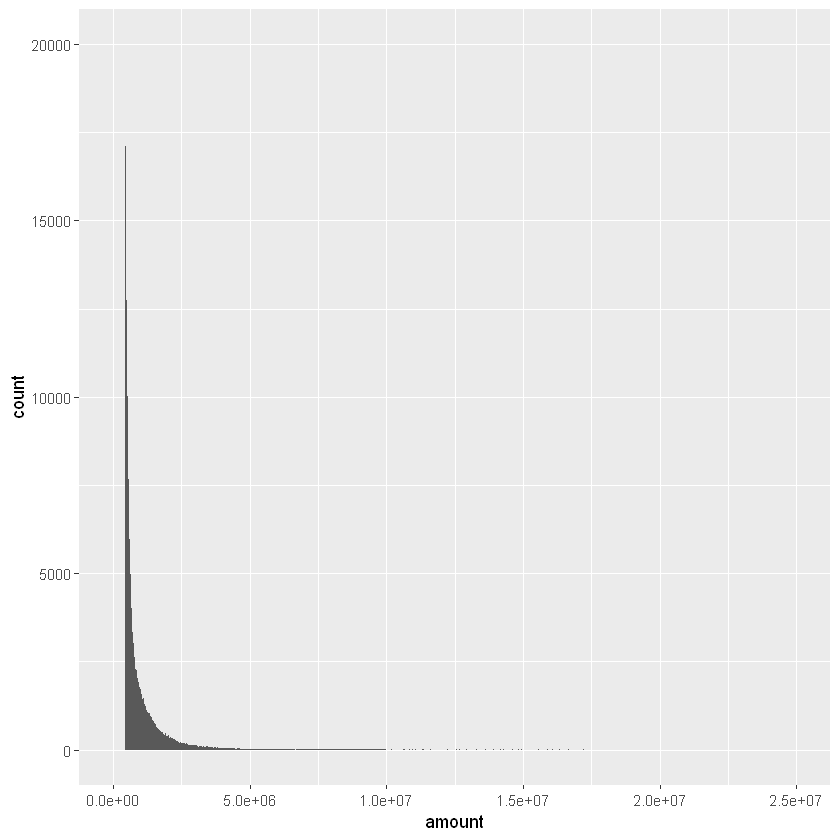

In [39]:
# Let's review one variable before setting up the rest of the histograms
ggplot(paysim, aes(amount)) + geom_histogram(bins = 20, binwidth = 10000) +
    xlim(0, 25000000) + ylim(0,20000) 

### Correlation Review

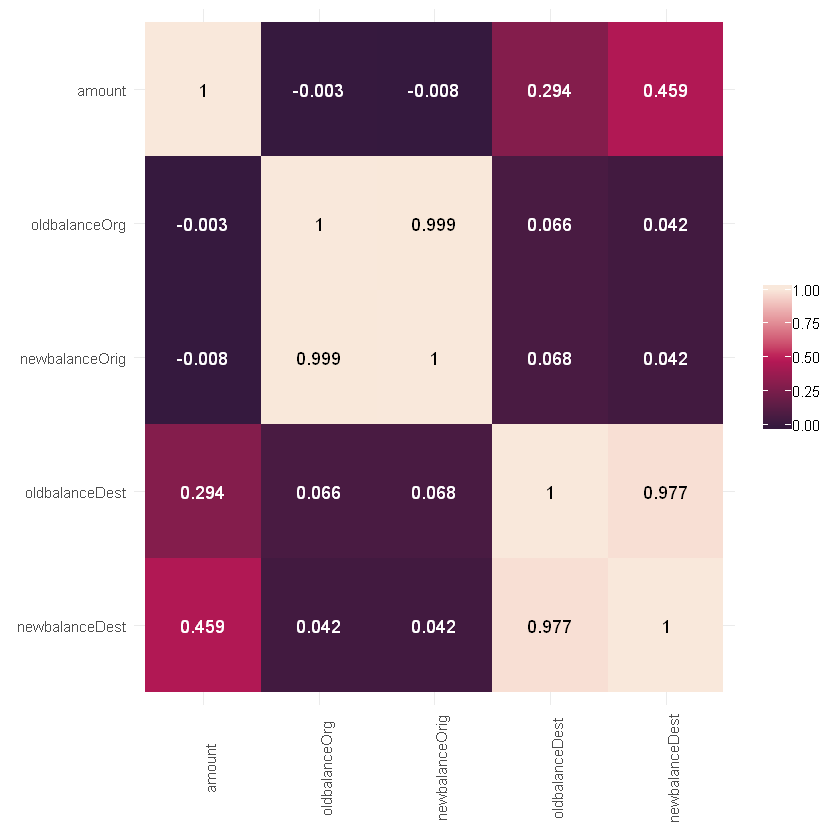

In [29]:
# Get correlations
cor_paysim <- round(cor(paysim[c("amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest")]),4)
melted_cor_paysim <- melt(cor_paysim)

ggplot(melted_cor_paysim, aes(x = Var1, y= reorder(Var2, desc(Var2)), fill = value)) +
  geom_tile() +
  theme_minimal() +
  geom_text(aes(color = value > .6, label = round(value,3))) +
  scale_color_manual(guide = FALSE, values = c("white","black")) +
  scale_fill_gradient2(low = "#35193e",mid = "#bc1656", high="#faebdd", midpoint = .5) +
  xlab(element_blank()) + ylab(element_blank()) +
  theme(axis.text.x = element_text(angle = 90), legend.title = element_blank())

## 3. Data Transformation
### Normalization

In [32]:
normalize2 <- function(x) {
  return((x - min(x)) / (max(x) - min(x)))
}

In [33]:
normvars <- vector()
normvars[c("normamount","normoldbalanceOrg",
           "normnewbalanceOrig","normoldbalanceDest",
           "normnewbalanceDest")] <- lapply(paysim[c("amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest")], normalize2)
paysim <- cbind(paysim, normvars)

head(paysim)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,TRANSFER,PAYMENT,CASH_OUT,DEBIT,CASH_IN,normamount,normoldbalanceOrg,normnewbalanceOrig,normoldbalanceDest,normnewbalanceDest
3,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0,0.00,1,...,1,0,0,0,0,1.957910e-06,3.037675e-06,0.000000000,0.000000e+00,0.0000000000
4,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182,0.00,1,...,0,0,1,0,0,1.957910e-06,3.037675e-06,0.000000000,5.949734e-05,0.0000000000
8,1,PAYMENT,7861.64,C1912850431,176087.2,168225.59,M633326333,0,0.00,0,...,0,1,0,0,0,8.504079e-05,2.955225e-03,0.003392668,0.000000e+00,0.0000000000
9,1,PAYMENT,4024.36,C1265012928,2671.0,0.00,M1176932104,0,0.00,0,...,0,1,0,0,0,4.353224e-05,4.482669e-05,0.000000000,0.000000e+00,0.0000000000
10,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898,40348.79,0,...,0,0,0,1,0,5.773963e-05,7.001757e-04,0.000733734,1.176858e-04,0.0001132822
11,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845,157982.12,0,...,0,0,0,1,0,1.043311e-04,7.493492e-05,0.000000000,3.046212e-05,0.0004435466


## 4. Prepare Data Sets

In [34]:
# Select only the relevant variables
X2 <- paysim[c("normamount","normoldbalanceOrg","normnewbalanceOrig",
                         "normoldbalanceDest","normnewbalanceDest","PAYMENT",
                         "TRANSFER","CASH_OUT", "DEBIT", "CASH_IN", "isFraud")]

### K-folds Cross-Validation

In [35]:
kf <- createFolds(X2$isFraud, k = 10)

## 5. Modeling and Testing
### Creating the Logistic Regression Model

In [37]:
counter <- 1
cv = lapply(kf, function(x) {
  # Establishes the training and testing folds
  training_fold = X2[-x,]
  test_fold = X2[x,]
  # Constructing model
  model <- glm(isFraud ~. ,family = binomial, data=training_fold)
  pred <- round(predict(model, newdata = test_fold, type = "response"),0)
  
  # Evaluating the Logistic Regression Model
  accuracy = accuracy(test_fold$isFraud, pred)
  precision = precision(test_fold$isFraud, pred)
  recall = recall(test_fold$isFraud, pred)
  f1 = (2*precision*recall)/(precision + recall)
  print(paste("Fold",counter,"Results:"))
  print(paste("Accuracy:",accuracy))
  print(paste("Precision:",precision))
  print(paste("Recall:",recall))
  print(paste("F1:",f1))
  counter <<- counter + 1
})

[1] "Fold 1 Results:"
[1] "Accuracy: 0.999250307656763"
[1] "Precision: 0.884057971014493"
[1] "Recall: 0.460377358490566"
[1] "F1: 0.60545905707196"
[1] "Fold 2 Results:"
[1] "Accuracy: 0.999233020359537"
[1] "Precision: 0.894396551724138"
[1] "Recall: 0.485948477751756"
[1] "F1: 0.629742033383915"
[1] "Fold 3 Results:"
[1] "Accuracy: 0.999261310592177"
[1] "Precision: 0.88755980861244"
[1] "Recall: 0.467254408060453"
[1] "F1: 0.612211221122112"
[1] "Fold 4 Results:"
[1] "Accuracy: 0.999218874015538"
[1] "Precision: 0.914549653579677"
[1] "Recall: 0.462616822429907"
[1] "F1: 0.614429790535299"
[1] "Fold 5 Results:"
[1] "Accuracy: 0.999187441651395"
[1] "Precision: 0.871733966745843"
[1] "Recall: 0.442168674698795"
[1] "F1: 0.586730615507594"
[1] "Fold 6 Results:"
[1] "Accuracy: 0.999283312980051"
[1] "Precision: 0.880487804878049"
[1] "Recall: 0.470052083333333"
[1] "F1: 0.612903225806452"
[1] "Fold 7 Results:"
[1] "Accuracy: 0.999239307077902"
[1] "Precision: 0.875930521091811"
[1] "

## 7. Hyperparameter Tuning
The number of folds is a hyperparameter that we can use to train our model. We are going to test k= 5 and k = 15.
### K = 5

In [42]:
kf <- createFolds(X2$isFraud, k = 5)

counter <- 1
cv5 = lapply(kf, function(x) {
  # Establishes the training and testing folds
  training_fold = X2[-x,]
  test_fold = X2[x,]
  # Constructing model
  model <- glm(isFraud ~. ,family = binomial, data=training_fold)
  pred <- round(predict(model, newdata = test_fold, type = "response"),0)
  
  # Evaluating the Logistic Regression Model
  accuracy = accuracy(test_fold$isFraud, pred)
  precision = precision(test_fold$isFraud, pred)
  recall = recall(test_fold$isFraud, pred)
  f1 = (2*precision*recall)/(precision + recall)
  print(paste("Fold",counter,"Results:"))
  print(paste("Accuracy:",accuracy))
  print(paste("Precision:",precision))
  print(paste("Recall:",recall))
  print(paste("F1:",f1))
  counter <<- counter + 1
})

[1] "Fold 1 Results:"
[1] "Accuracy: 0.999212587906073"
[1] "Precision: 0.876443418013857"
[1] "Recall: 0.458887545344619"
[1] "F1: 0.602380952380952"
[1] "Fold 2 Results:"
[1] "Accuracy: 0.999273097617882"
[1] "Precision: 0.880093131548312"
[1] "Recall: 0.479087452471483"
[1] "F1: 0.620434961017645"
[1] "Fold 3 Results:"
[1] "Accuracy: 0.999258166650033"
[1] "Precision: 0.889679715302491"
[1] "Recall: 0.468457214241099"
[1] "F1: 0.613747954173486"
[1] "Fold 4 Results:"
[1] "Accuracy: 0.999205515342355"
[1] "Precision: 0.882147024504084"
[1] "Recall: 0.453781512605042"
[1] "F1: 0.599286563614744"
[1] "Fold 5 Results:"
[1] "Accuracy: 0.999209444544421"
[1] "Precision: 0.900452488687783"
[1] "Recall: 0.46441073512252"
[1] "F1: 0.612779060816012"


### K = 15

In [41]:
kf <- createFolds(X2$isFraud, k = 15)
counter <- 1
cv15 = lapply(kf, function(x) {
  # Establishes the training and testing folds
  training_fold = X2[-x,]
  test_fold = X2[x,]
  # Constructing model
  model <- glm(isFraud ~. ,family = binomial, data=training_fold)
  pred <- round(predict(model, newdata = test_fold, type = "response"),0)
  
  # Evaluating the Logistic Regression Model
  accuracy = accuracy(test_fold$isFraud, pred)
  precision = precision(test_fold$isFraud, pred)
  recall = recall(test_fold$isFraud, pred)
  f1 = (2*precision*recall)/(precision + recall)
  print(paste("Fold",counter,"Results:"))
  print(paste("Accuracy:",accuracy))
  print(paste("Precision:",precision))
  print(paste("Recall:",recall))
  print(paste("F1:",f1))
  counter <<- counter + 1
})

[1] "Fold 1 Results:"
[1] "Accuracy: 0.999238521836506"
[1] "Precision: 0.906474820143885"
[1] "Recall: 0.459016393442623"
[1] "F1: 0.609431680773882"
[1] "Fold 2 Results:"
[1] "Accuracy: 0.999165436825454"
[1] "Precision: 0.867647058823529"
[1] "Recall: 0.425992779783394"
[1] "F1: 0.571428571428571"
[1] "Fold 3 Results:"
[1] "Accuracy: 0.999203157194925"
[1] "Precision: 0.906574394463668"
[1] "Recall: 0.457242582897033"
[1] "F1: 0.607888631090487"
[1] "Fold 4 Results:"
[1] "Accuracy: 0.999257380226039"
[1] "Precision: 0.904761904761905"
[1] "Recall: 0.5"
[1] "F1: 0.64406779661017"
[1] "Fold 5 Results:"
[1] "Accuracy: 0.999266810318407"
[1] "Precision: 0.848375451263538"
[1] "Recall: 0.466269841269841"
[1] "F1: 0.60179257362356"
[1] "Fold 6 Results:"
[1] "Accuracy: 0.999141861594534"
[1] "Precision: 0.872791519434629"
[1] "Recall: 0.429565217391304"
[1] "F1: 0.575757575757576"
[1] "Fold 7 Results:"
[1] "Accuracy: 0.999262095272223"
[1] "Precision: 0.891608391608392"
[1] "Recall: 0.4748